In [46]:
import numpy as np
from numpy.fft import fft2, ifft2
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import skimage.metrics

# Section 1

In [47]:
def deconvolution_wiener(src: np.ndarray, psf: np.ndarray, K: np.float64) -> np.ndarray:
  # ...
  psf = np.float64(psf)
  psf /= np.sum(psf)
  dummy = np.copy(src)
  dummy = fft2(dummy)
  psf = fft2(psf, s = src.shape)
  psf = np.conj(psf) / (np.abs(psf)**2 + K)
  deconvoled = dummy * psf
  deconvoled = np.abs(ifft2(deconvoled))
  return deconvoled

Load and test the image

In [48]:
img_1 = cv2.imread("HW_7_2_1.jpg", cv2.IMREAD_GRAYSCALE)
psf_1  = cv2.imread("HW_7_2_psf_1.jpg", cv2.IMREAD_GRAYSCALE)

In [49]:
deblurred_img = deconvolution_wiener(img_1, psf_1, K=0.01)
deblurred_img = deblurred_img[:512,:512]


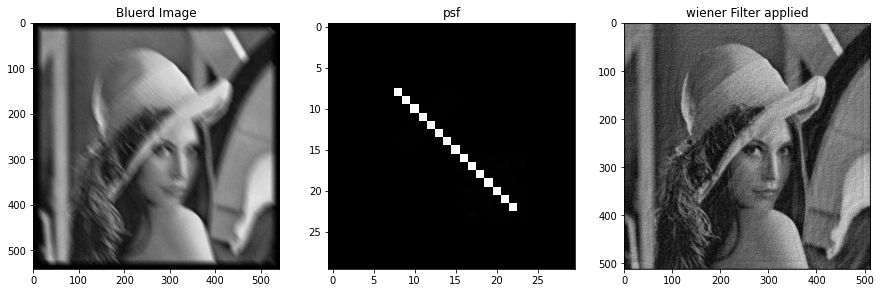

In [50]:
display = [img_1, psf_1, deblurred_img]
label = ['Bluerd Image', 'psf', 'wiener Filter applied']
fig = plt.figure(figsize=(15, 10))
for i in range(len(display)):
    fig.add_subplot(1, 3, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
plt.show()

#Section 2

Meterics:

In [51]:
def ssim(image_1: np.ndarray, image2: np.ndarray):
  return skimage.metrics.structural_similarity(image_1, image2, data_range=256);

In [52]:
img_base = cv2.imread("HW_7_2_base.jpg", cv2.IMREAD_GRAYSCALE)


Now try multiple K and compare them to the original image

In [53]:
max_value = 0
max_k = 0
for K in range(100):
  K /= 100
  ssim_value = ssim(img_base,deconvolution_wiener(img_1, psf_1, K)[:512,:512])
  if ssim_value > max_value:
    max_value = ssim_value
    max_k=K
print("max ssim for diffrent Ks: {}".format(max_value))
print("corresponding K: {}".format(max_k))


max ssim for diffrent Ks: 0.6139065355450042
corresponding K: 0.16


In [54]:
print("ssim for k=0.01: {}".format(ssim(img_base,deblurred_img)))

ssim for k=0.01: 0.31120744589694177


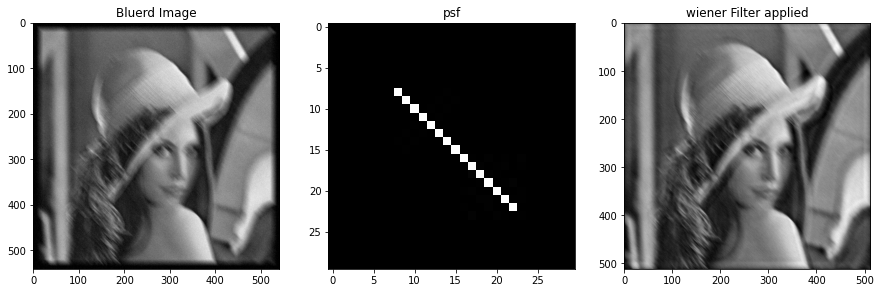

In [55]:
deblurred_max_ssim = deconvolution_wiener(img_1, psf_1, K=0.16)
deblurred_max_ssim = deblurred_max_ssim[:512,:512]

display = [img_1, psf_1, deblurred_max_ssim]
label = ['Bluerd Image', 'psf', 'wiener Filter applied']
fig = plt.figure(figsize=(15, 10))
for i in range(len(display)):
    fig.add_subplot(1, 3, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
plt.show()

# Section 3 (Bonus)